# <center><font color=#10e2e6>Kaggle Playground: Predicting Loan Approval</font></center>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train = pd.read_csv('/Users/poodle/Data Science Projects/Kaggle Playground/playground-series-s4e10/train.csv')
test = pd.read_csv('/Users/poodle/Data Science Projects/Kaggle Playground/playground-series-s4e10/test.csv')

In [4]:
train.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
lbl.fit(train['person_home_ownership'])
train['person_home_ownership'] = lbl.transform(train['person_home_ownership'])
lbl.fit(train['loan_intent'])
train['loan_intent'] = lbl.transform(train['loan_intent'])
lbl.fit(train['loan_grade'])
train['loan_grade'] = lbl.transform(train['loan_grade'])
lbl.fit(train['cb_person_default_on_file'])
train['cb_person_default_on_file'] = lbl.transform(train['cb_person_default_on_file'])

lbl.fit(test['person_home_ownership'])
test['person_home_ownership'] = lbl.transform(test['person_home_ownership'])
lbl.fit(test['loan_intent'])
test['loan_intent'] = lbl.transform(test['loan_intent'])
lbl.fit(test['loan_grade'])
test['loan_grade'] = lbl.transform(test['loan_grade'])
lbl.fit(test['cb_person_default_on_file'])
test['cb_person_default_on_file'] = lbl.transform(test['cb_person_default_on_file'])

train

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14,0
1,1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,0,5.0,1,3,25000,15.95,0.21,1,10,0
58641,58641,28,28800,3,0.0,3,2,10000,12.73,0.35,0,8,1
58642,58642,23,44000,3,7.0,1,3,6800,16.00,0.15,0,2,1
58643,58643,22,30000,3,2.0,1,0,5000,8.90,0.17,0,3,0


In [6]:
from sklearn.model_selection import train_test_split

X = train.drop(['loan_status', 'id'], axis=1)
y = train['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=.3)

In [7]:
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

predictions = model.predict(X_test)

print('ROC_AUC: ', roc_auc_score(y_test, predictions))

ROC_AUC:  0.8767290926721213


In [8]:
sublesson = pd.DataFrame()
sublesson['id'] = test.id

feats = test.select_dtypes(include=[np.number]).drop(['id'], axis=1).interpolate()
predictions = model.predict(feats)

sublesson['loan_status'] = predictions
sublesson.to_csv('PS_S4E10.csv', index=False)

sublesson

,id,loan_status
0,58645,0.908417
1,58646,0.092108
2,58647,0.482653
3,58648,0.046733
4,58649,0.227842
...,...,...
39093,97738,0.085224
39094,97739,0.047079
39095,97740,0.092368
39096,97741,0.624331


In [9]:
print('Public Score: .87357')

Public Score: .87357


In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(ss.fit_transform(X_test),columns=X_test.columns)
test_scaled = pd.DataFrame(ss.fit_transform(test),columns=test.columns)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

input_shape = [X_train.shape[1]]

In [11]:
model = keras.Sequential([
    #512 indicates how many 'neurons' we want. 'activation' sets the function to use, which it is set to  'relu' also known as 'Rectified Linear Unit'. 
    #'input_shape' is set to how many columns are in the training dataset
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    #rate is the frequency it sets inputs to 0, in this case 30% of the time.
    layers.Dropout(rate=.3),
    layers.Dense(256, activation='relu', input_shape=input_shape),
    layers.Dropout(rate=.3),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dropout(rate=.3),
    layers.BatchNormalization(),
    layers.Dense(1)
])

/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.1104 - val_loss: 0.1050
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2952 - val_loss: 0.1108
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.1407 - val_loss: 0.1013
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0938 - val_loss: 0.0916
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0783 - val_loss: 0.0764
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0752 - val_loss: 0.0728
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0743 - val_loss: 0.0702
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0732 - val_loss: 0.0651
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0698 - val_loss: 0.0645
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0717 - val_loss: 0.0642
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0700 - val_loss: 0.0633
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0

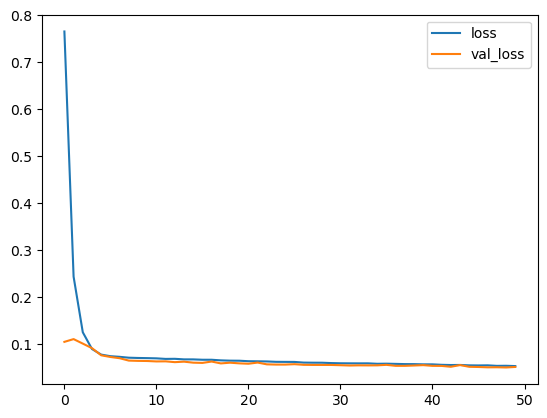

In [13]:
model.compile(
    optimizer='adam',
    loss='mse'
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    monitor='val_loss',
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    batch_size=512,
    epochs=50,
    verbose=1
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print('Minimum Validation Loss: {:0.4f}'.format(history_df['val_loss'].min()))

In [15]:
predictions = model.predict(X_test)

print('ROC AUC: ', roc_auc_score(y_test, predictions))

550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
ROC AUC:  0.30058492131356096


In [16]:
sublesson = pd.DataFrame()
sublesson['id'] = test.id

feats = test.select_dtypes(include=[np.number]).drop(['id'], axis=1).interpolate()
predictions = model.predict(feats)

sublesson['loan_status'] = predictions
sublesson.to_csv('PS_S4E10.csv', index=False)


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
